In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [6]:
df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Sky's the Limit\BAN6025Project2Data.csv")
df.head()

,Target_Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200,0,INTERNET,3.743048,other,0,1,0,0


In [2]:
def metrics(y, x):
    print(f'Accuracy: {accuracy_score(y, x)}')
    print(f'Precision: {precision_score(y, x)}')
    print(f'Recall: {recall_score(y, x)}')
    print(f'F1 Score: {f1_score(y, x)}')
    print(f'ROC AUC: {roc_auc_score(y, x)}')

In [3]:
chosen_columns = ['X5',
 'X28',
 'X23',
 'X27_windows',
 'X22',
 'X19',
 'X2',
 'X1',
 'X8_AC',
 'X18_BC',
 'X18_BB',
 'X18_BE',
 'X18_BD',
 'X29',
 'X17',
 'X3',
 'X16',
 'X15_CB',
 'X21',
 'X24',
 'X14',
 'X7',
 'X9',
 'X27_macintosh',
 'X15_CC',
 'X18_BF',
 'X27_other',
 'X31',
 'X25_TELEAPP',
 'X15_CD',
 'X15_CF',
 'X20',
 'X6',
 'X4',
 'X13',
 'X15_CE',
 'X18_BG',
 'X27_x11']
print(len(chosen_columns))

38


In [7]:
df = pd.get_dummies(df, columns=['X8', 'X18', 'X15', 'X25', 'X27'], drop_first=True, dtype=float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Target_Y       1000000 non-null  int64  
 1   X1             1000000 non-null  float64
 2   X2             1000000 non-null  float64
 3   X3             1000000 non-null  int64  
 4   X4             1000000 non-null  int64  
 5   X5             1000000 non-null  int64  
 6   X6             1000000 non-null  float64
 7   X7             1000000 non-null  float64
 8   X9             1000000 non-null  int64  
 9   X10            1000000 non-null  float64
 10  X11            1000000 non-null  float64
 11  X12            1000000 non-null  float64
 12  X13            1000000 non-null  int64  
 13  X14            1000000 non-null  int64  
 14  X16            1000000 non-null  int64  
 15  X17            1000000 non-null  int64  
 16  X19            1000000 non-null  int64  
 17  X20      

In [8]:
sample_size = 0.05

sample_df = df.groupby('Target_Y', group_keys=False).apply(lambda x: x.sample(frac=sample_size, random_state=69))

sample_df.head()

C:\Users\trush\AppData\Local\Temp\ipykernel_39516\4115993255.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('Target_Y', group_keys=False).apply(lambda x: x.sample(frac=sample_size, random_state=69))


,Target_Y,X1,X2,X3,X4,X5,X6,X7,X9,X10,...,X15_CC,X15_CD,X15_CE,X15_CF,X15_CG,X25_TELEAPP,X27_macintosh,X27_other,X27_windows,X27_x11
434757,0,0.1,0.305352,-1,116,40,0.019318,-1.187689,3447,11124.876879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
334757,0,0.2,0.998933,29,5,20,17.990344,-1.101194,4507,11228.317603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
895206,0,0.6,0.249452,31,16,40,0.010178,9.409894,1291,5087.989767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
723405,0,0.3,0.142540,-1,118,40,0.007960,49.521697,2353,4698.312868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
133474,0,0.4,0.397762,-1,75,40,0.008105,27.252734,846,10738.552406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
X = sample_df.drop(columns=['Target_Y'])
y = sample_df['Target_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=69)
y.shape

(50000,)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\trush\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_43', 'keras_tensor_44']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Step: 0, Discriminator Loss: 0.6331211924552917, Generator Loss: 0.829177975654602
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━

c:\Users\trush\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_43', 'keras_tensor_44']. Received: the structure of inputs=('*', '*')
  warnings.warn(


              1         2         3         4         5         6         7  \
0      2.160142 -1.804860  0.583784 -0.417439 -0.120152 -0.099981  0.886353   
1      0.981893  0.146368 -1.630394  0.357129 -0.386681  0.312404  0.300806   
2      1.443269 -0.905809 -0.180142 -0.862803 -0.664842 -0.664640 -0.505204   
3      1.865801 -1.080713  0.407342 -0.936296  1.218388 -1.234626 -0.040583   
4      2.330611 -1.340137  1.194584 -0.887818  0.180801 -0.852057  1.021695   
...         ...       ...       ...       ...       ...       ...       ...   
48893  0.606423 -1.403655  1.279003 -1.296340 -0.386762 -0.424861  0.646151   
48894  0.928176 -1.775902  1.105180  0.094182  0.414177 -0.373001  0.330726   
48895  1.561452 -2.527777 -0.659576 -0.171591  0.135760 -1.403020  1.038218   
48896  2.873476 -2.201581  0.810608 -1.488837  0.651547 -0.620928  0.127845   
48897  1.084455 -0.680170 -0.672174 -1.964771  0.690995 -0.619774  0.479697   

              8         9        10  ...        29 

Text(0.5, 1.0, 'Generator Loss vs. Step')

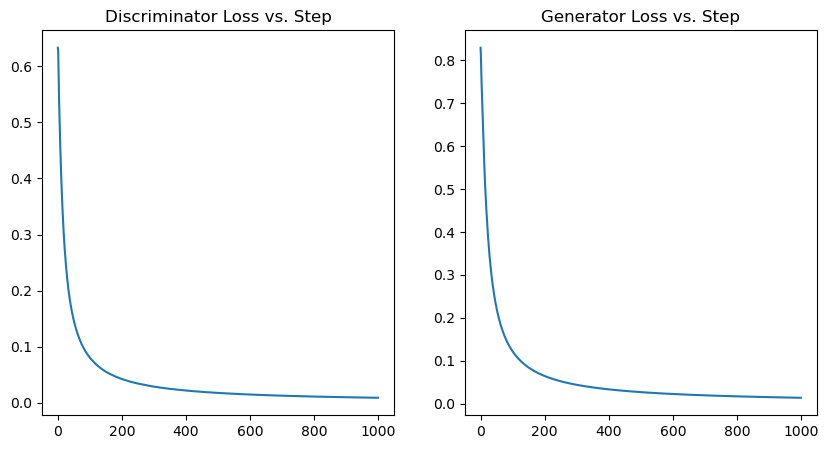

In [14]:
# Load dataset
X = sample_df.drop(['Target_Y'], axis=1)
X = X[chosen_columns]
Y = sample_df['Target_Y']

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert data to pandas DataFrame
real_data = pd.DataFrame(X, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                                    '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
                                    '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'])
real_labels = Y

# One hot encode labels
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = one_hot_encoder.fit_transform(np.array(real_labels).reshape(-1, 1))

# Constants
NOISE_DIM = 100
NUM_CLASSES = 2
NUM_FEATURES = 38
BATCH_SIZE = 64
TRAINING_STEPS = 1000

# Generator
def create_generator():
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([noise_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(NUM_FEATURES, activation='linear')(hidden)
    model = Model(inputs=[noise_input, class_input], outputs=output)
    return model

# Discriminator
def create_discriminator():
    data_input = Input(shape=(NUM_FEATURES,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([data_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(1, activation='sigmoid')(hidden)
    model = Model(inputs=[data_input, class_input], outputs=output)
    return model

# cGAN
def create_cgan(generator, discriminator):
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    generated_data = generator([noise_input, class_input])
    validity = discriminator([generated_data, class_input])
    model = Model(inputs=[noise_input, class_input], outputs=validity)
    return model

# Create and compile the Discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Create the Generator
generator = create_generator()

# Create the GAN
gan = create_cgan(generator, discriminator)

# Ensure that only the generator is trained
discriminator.trainable = False

gan.compile(loss='binary_crossentropy', optimizer=Adam())


discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Create the Generator
generator = create_generator()

# Train GAN
step_list = []
loss_list_discriminator = []
loss_list_generator = []
for step in range(TRAINING_STEPS):
    # Select a random batch of real data with labels
    idx = np.random.randint(0, real_data.shape[0], BATCH_SIZE)
    real_batch = real_data.iloc[idx].values
    labels_batch = one_hot_labels[idx]

    # Generate a batch of new data
    noise = np.random.normal(0, 1, (BATCH_SIZE, NOISE_DIM))
    generated_batch = generator.predict([noise, labels_batch])

    # Train the discriminator
    real_loss = discriminator.train_on_batch([real_batch, labels_batch], np.ones((BATCH_SIZE, 1)))
    fake_loss = discriminator.train_on_batch([generated_batch, labels_batch], np.zeros((BATCH_SIZE, 1)))
    discriminator_loss = 0.5 * np.add(real_loss, fake_loss)

    # Train the generator
    generator_loss = gan.train_on_batch([noise, labels_batch], np.ones((BATCH_SIZE, 1)))

    if step % 50 == 0:
        print(f"Step: {step}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")
    
    step_list.append(step)
    loss_list_discriminator.append(discriminator_loss)
    loss_list_generator.append(generator_loss)

# Generate instances for a given class
def generate_data(generator, data_class, num_instances):
    one_hot_class = one_hot_encoder.transform(np.array([[data_class]]))
    noise = np.random.normal(0, 1, (num_instances, NOISE_DIM))
    generated_data = generator.predict([noise, np.repeat(one_hot_class, num_instances, axis=0)])
    return pd.DataFrame(generated_data, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
                                    '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
                                    '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'])

# Generate 48898 instances of class 1
generated_data = generate_data(generator, 1, 48898)
print(generated_data)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(step_list, loss_list_discriminator)
plt.title('Discriminator Loss vs. Step')
    
plt.subplot(1,2,2)
plt.plot(step_list, loss_list_generator)
plt.title('Generator Loss vs. Step')

In [66]:
X_selected = sample_df[chosen_columns]
columns = list(X_selected.columns)
synthetic_columns = list(generated_data.columns)

column_map = {}
for i in range(len(columns)):
    column_map[synthetic_columns[i]] = columns[i]

type(X_selected)

pandas.core.frame.DataFrame

In [67]:
generated_data.rename(columns=column_map, inplace=True)
generated_data.head()

,X5,X28,X23,X27_windows,X22,X19,X2,X1,X8_AC,X18_BC,...,X25_TELEAPP,X15_CD,X15_CF,X20,X6,X4,X13,X15_CE,X18_BG,X27_x11
0,2.160142,-1.804860,0.583784,-0.417439,-0.120152,-0.099981,0.886353,-0.802634,-0.627129,-0.677113,...,1.445077,-0.216119,-1.355828,-0.492607,-1.688267,-0.265961,0.604759,0.578137,0.536515,-1.615055
1,0.981893,0.146368,-1.630394,0.357129,-0.386681,0.312404,0.300806,-0.815110,-0.335585,-1.113221,...,1.436473,-0.940430,-0.702137,-0.773423,0.023064,-1.641689,0.005598,0.462358,0.062959,-0.797901
2,1.443269,-0.905809,-0.180142,-0.862803,-0.664842,-0.664640,-0.505204,1.403075,0.195980,-0.795474,...,1.194078,-2.048804,-0.454379,0.292705,-0.311741,-1.086618,0.033853,-0.047485,0.076339,-0.927036
3,1.865801,-1.080713,0.407342,-0.936296,1.218388,-1.234626,-0.040583,0.716249,0.139298,-0.435736,...,1.030752,-1.054060,-0.319075,-0.441536,0.338760,-0.835309,0.061079,-0.711559,-0.477092,-0.722665
4,2.330611,-1.340137,1.194584,-0.887818,0.180801,-0.852057,1.021695,-0.265540,-0.653482,-1.105255,...,0.648674,-1.183325,-1.277162,0.543479,0.400816,-0.217908,-0.244497,-0.086400,0.663199,-0.977340


In [68]:
new_df = pd.concat([X_selected, generated_data], axis=0)
new_df.shape

(98898, 38)

In [69]:
new_X = scaler.fit_transform(new_df)
new_X = pd.DataFrame(new_X)
new_X.shape

(98898, 38)

In [70]:
synthetic_target = [1 for i in range(48898)]

In [71]:
generated_y = {'Target_Y': synthetic_target}

generated_y = pd.DataFrame(generated_y)

In [72]:
new_y = pd.concat([y, generated_y], axis=0)
new_y.shape

(98898, 1)

In [85]:
X = new_X
y = new_y

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69, stratify=y)

In [86]:
model = Sequential()
model.add(Dense(19, activation='sigmoid', input_shape=(X_train.shape[1],)))  # Matches feature count
model.add(Dense(1, activation='sigmoid'))  # No need for input_shape

# Compile model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using resampled training data
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100


c:\Users\trush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1082/1082 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8682 - loss: 0.4719
Epoch 2/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9942 - loss: 0.0574
Epoch 3/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9941 - loss: 0.0424
Epoch 4/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9946 - loss: 0.0365
Epoch 5/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9948 - loss: 0.0335
Epoch 6/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9948 - loss: 0.0315
Epoch 7/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0331
Epoch 8/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0318
Epoch 9/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9945 - loss: 0.0308
Epoch 10/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0311
Epoch 11/100
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9946 - loss: 0.0294
Epoch 12/100
1082/1082 ━━━━━━━━

In [87]:
y_pred_probs_train = model.predict(X_train)
y_pred_train = (y_pred_probs_train > 0.5).astype(int)

y_pred_probs_test = model.predict(X_test)
y_pred_test = (y_pred_probs_test > 0.5).astype(int)

2164/2164 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
928/928 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [88]:
print('---Train---')
metrics(y_train, y_pred_train)

print('---Test---')
metrics(y_test, y_pred_test)

---Train---
Accuracy: 0.9945686716357544
Precision: 1.0
Recall: 0.9891373432715086
F1 Score: 0.9945390112124557
ROC AUC: 0.9945686716357542
---Test---
Accuracy: 0.9941354903943377
Precision: 0.9999318011321012
Recall: 0.9883383889450623
F1 Score: 0.994101295003051
ROC AUC: 0.9941354903943377
